<h1 style = "text-align: center"> <b>EDA on Multiple Datasets</b></h1>
<p style = "text-align: center">Exploratory Data Analysis (EDA) is a crucial initial step in data science projects. It involves analyzing and visualizing data to understand its key characteristics, uncover patterns, and identify relationships between variables refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables </p>

<hr>

Types of EDA  in context of number of varibale under study
<br>
* Univariate analysis
* Bivariate ananlysis 
* Muti-variate ananlysis  

### **Univariate analysis**

When you study the trens and pattern in data one variable at a time. 

Types of data:
* Numerical  
* categorical  



*Importing Libraries*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("data/titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h4><b> Some insights about the columns: Titanic </b></h4>


 | Comlumn name  | Description |
 |---------------|-------------|
 | *PassengerId* | id of the passenger  |
 | *Survived*    |  sarvived / not| 
 | *Pclass*      | The class the person wass allotted - *1 / 2 / 3*|
 | *Name*        | Name of the passenger |
 | *Sex*         | Sex of the passenger  |
 | *Age*         | Age of the passenger  |
 | *SipSp*       | Did the person travel with a spouse?|
 | *Parch*       | Did the person travel with a parent or child?|
 | *Ticket*      | the Ticket No.|
 | *Fare*        | Ticket Fare |
 | *Cabin*       | Cabin info - (additional insight from nitish: cabins were alloted to ppl only in pclass 1.)|
 | *Embarked*    |  where did the passenger board the ship? |


### **Categorical Analysis**

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_subplots(df, columns, suptitle = None,  ncols=2, type = "countplot"):
    """
    Create subplots from a list of column names in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to create subplots for.
    ncols (int): Number of columns in the subplot grid.
    
    Returns:
    None
    """
    nrows = (len(columns) + ncols - 1) // ncols  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    
    for idx, column in enumerate(columns):
        row = idx // ncols
        col = idx % ncols
        if type == "count":
            sns.countplot(data=df, x=column, ax=axes[row, col])
        if type == "hist":
            sns.histplot(data=df, x = column,bins = 30, ax=axes[row, col])
        if type == "dist":
            sns.displot(data = df, x = column, ax = axes[row, col])
        
        
        axes[row, col].set_title(column)

    # Hide any unused subplots
    for ax in axes.flat[len(columns):]:
        ax.set_visible(False)
    
    plt.suptitle(suptitle)
    plt.tight_layout()
    plt.show()


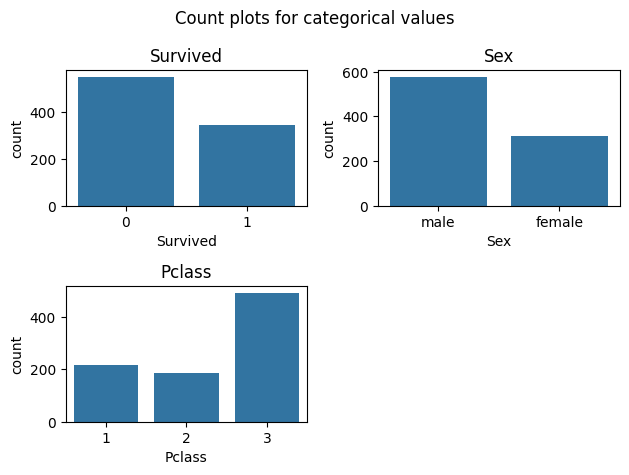

In [77]:
create_subplots(df = df, 
                columns = ['Survived', 'Sex', 'Pclass'],
                suptitle= "Count plots for categorical values", 
                type = "count"
            )

<h4><b>Analysis:</b></h4>  <p><i> A univariate study of categorical variables.<i><p>

* **Survived** - About 60% of people on board did not survive the incident. 

* **Sex** - More Women survived  the incident compared to men, maybe women were given more importenace during the rescue missions. 

* **PClass** - Most poeple were accomodated in the class 3, mostly beacuse that was the cheapest, but class 1 has slighly more poeple posibly hinting at the price of class 1 being only slighly more than 2 so many people preferred 1 over 2. 
  

In [8]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<h3 align = "center"><b>Bi/ Multi Variate Analysis</b></h3>



*Analyse two or more vaiables at once.*

In [69]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


 **Tips dataset**

| Comlumn name  | Description |
 |---------------|-------------|
 | *total_bill* | The bill amount of the bill  |
 | *tip*    |  Tip amount| 
 | *sex*      | Sex of the customer|
 | *smoker*        | Is customer a smoker|

 

### **Scatterplot** (Numerical-Numerical)

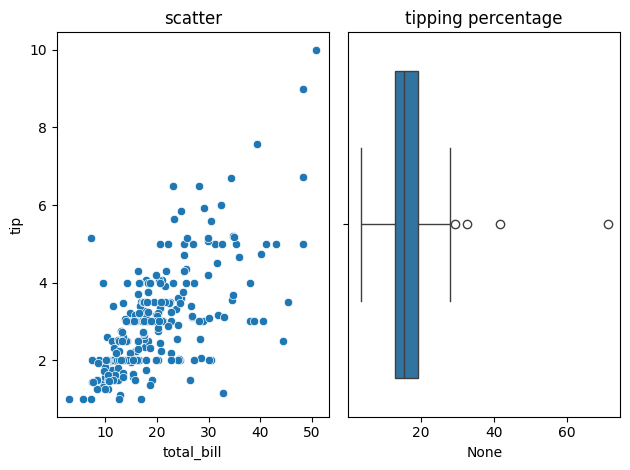

In [31]:

figure, axes = plt.subplots(1, 2)
axes[0].set_title("scatter")
sns.scatterplot(tips, x = "total_bill", y = "tip",ax = axes[0])
axes[1].set_title("tipping percentage")
sns.boxplot(x = (tips['tip']/tips['total_bill']*100))
plt.tight_layout()
plt.show()

In [26]:
print("mean", (tips['tip']/tips['total_bill']).mean()*100)
print("median", (tips['tip']/tips['total_bill']).median()*100)

mean 16.080258172250474
median 15.476977125802577


### **observations**
* A general pattern is that higher the total bill amount is greater is amout tipped. Although there are some data points that differe from this.
* we could do an aditional study of the distribution of the tipping percentage. The tipping percentage has a very narrow distribition centered at (15-16). Although there are some outliers too 

#### **Do more with scatterplot**

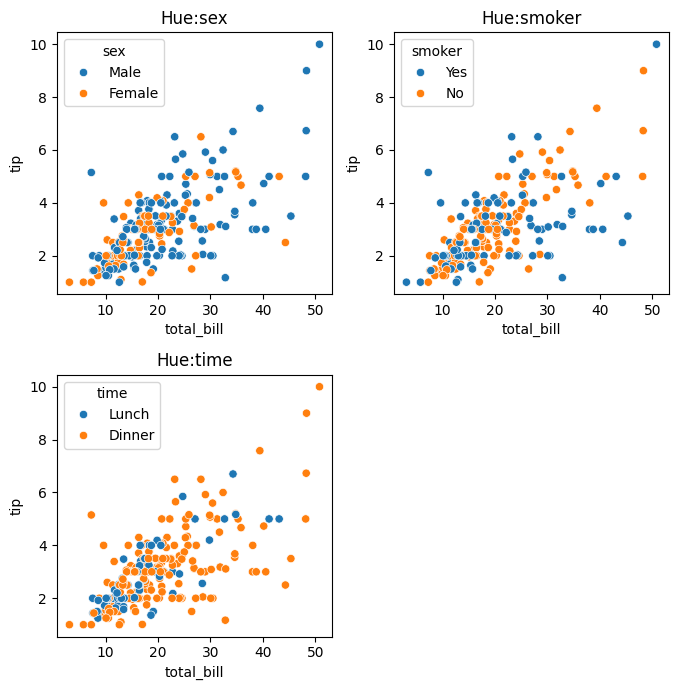

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
tips = sns.load_dataset("tips")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot scatter plots on the first three subplots
axes[0].set_title("Hue:sex")
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue=tips['sex'], ax=axes[0])

axes[1].set_title("Hue:smoker")
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue=tips['smoker'], ax=axes[1])

axes[2].set_title("Hue:time")
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue=tips['time'], ax=axes[2])
plt.tight_layout()
# Set the visibility of the last subplot to False
axes[-1].set_visible(False)

# Hide the rest of the unused subplots


### **Observations**
* The Male customers have tipped the highest amounts. 
* Data has most  data points from dinner time. 
* There is nothing distint about the graph thats splits on the basis  of smoker information. 

You could do some more multi variate anaylsis by using the following parameters of the scatterplot. like `hue`, `size`, `color` 

### **Barplot**  (Numerical- Categorical) 

Bar plot aggregates the  y values across different categorical classes. 

<Axes: xlabel='Pclass', ylabel='Fare'>

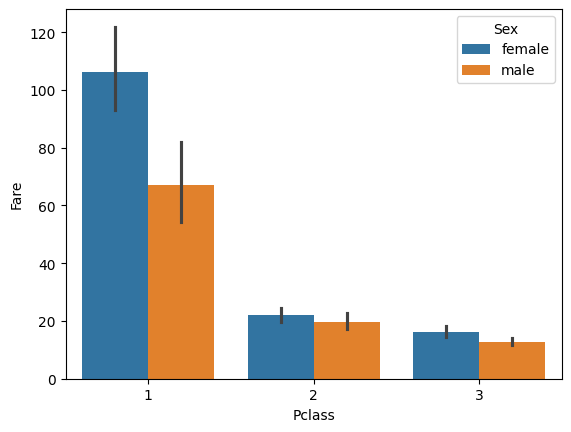

In [74]:
sns.barplot(x = df['Pclass'], y = df["Fare"], hue = df["Sex"])

**Observations**
* The class 1 has the highest average fares, while the average fares of  class 2 and 3 are almost comparable. 
* The Female passengers have higher fares compared to  thier male co passengers.  

### **Boxplot**  (Numerical - categorical)

Text(0.5, 1.0, 'Tipping percentage')

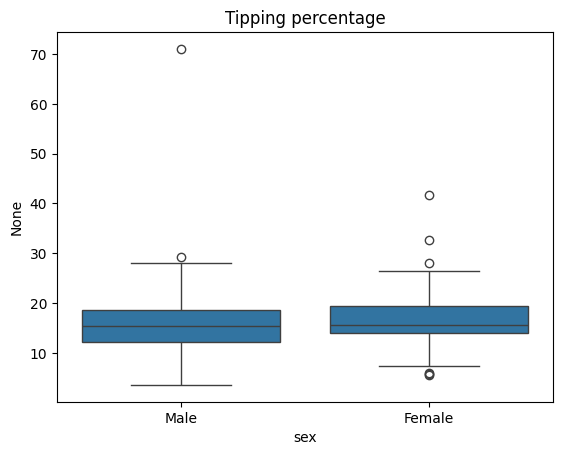

In [97]:
sns.boxplot(x = tips['sex'], y = (tips['tip']/tips['total_bill'])*100 )
plt.title("Tipping percentage")


#### **Tipping percentage observations**
* Female customers are slightly better tipper than male customers.

In [89]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Sex', ylabel='Age'>

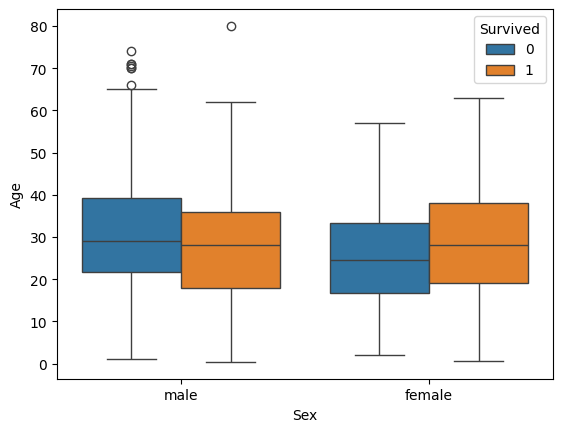

In [94]:
sns.boxplot(data = df, x = "Sex", y = "Age", hue = "Survived" ) 

#### **Titanic survival obervations**
* Younger population had a better chance of survivel in male population whiile older women survived more than younger women. 


### **Distplot** (Numerical - Categorical)

Thi provides the Kernal Density Esimation and the histogram for a variable

In [101]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [105]:
female_passenger = df[df['Sex']== "female"]

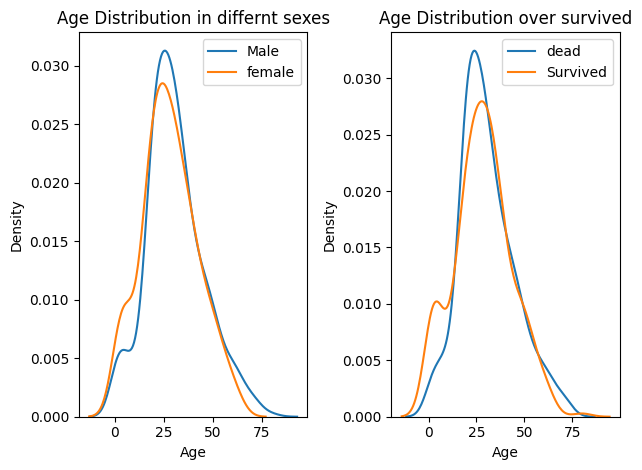

In [115]:
fig, ax = plt.subplots(1, 2)
male_passenger = df[df['Sex']== "male"]
female_passenger = df[df['Sex']== "female"]
sns.kdeplot(male_passenger['Age'], ax = ax[0], label="Male")
sns.kdeplot(female_passenger['Age'], ax = ax[0], label = "female")
ax[0].set_title("Age Distribution in differnt sexes")
ax[0].legend()
survived = df[df['Survived'] == 1]
dead = df[df["Survived"]== 0]
sns.kdeplot(dead['Age'], ax = ax[1], label = "dead")
sns.kdeplot(survived['Age'], ax = ax[1], label = "Survived")
ax[1].set_title("Age Distribution over survived")
ax[1].legend()
plt.tight_layout()


#### **Observations**
* There were slightly more middle aged male passengers as compared to female passengers, slighlty more female in the younger population. 
* kids and infants had a better survival rate compared to older people.  

### **HeatMap** (Categorical - Categorical)

*To perform comparisons across multiple classes of the categorical variable.*

In [129]:
# gives the counts across many categories.
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0.5, 1.0, 'PClass vs Survived')

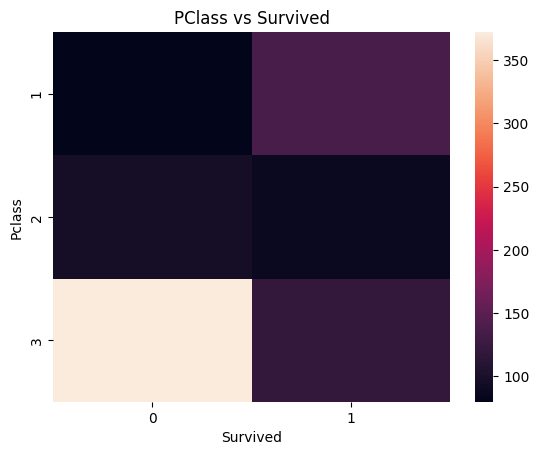

In [118]:
sns.heatmap(pd.crosstab(df['Pclass'], df['Survived']))
plt.title("PClass vs Survived")

#### **Observations**
* In the heatmap darker means a higher value. 
* you get side by side comparon count of survivedvs not survived in each class.
  

#### **Percentage survival across the categories.**

*Grouping to derive insights.*

In [145]:
df.groupby("Pclass")["Survived"].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

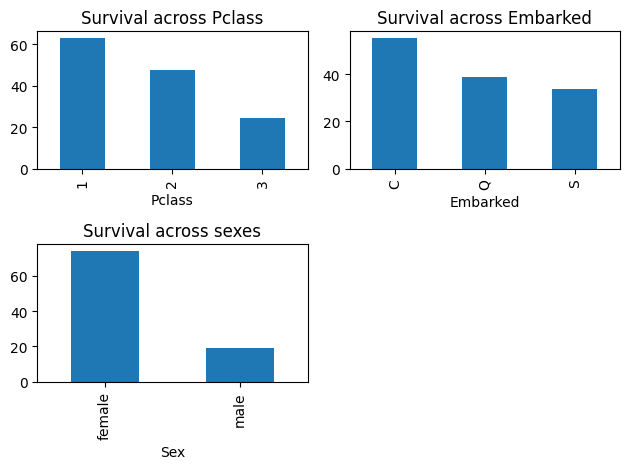

In [151]:
plt.subplot(2, 2, 1), (df.groupby("Pclass")["Survived"].mean()*100).plot(kind = "bar"), plt.title("Survival across Pclass")
plt.subplot(2, 2, 2), (df.groupby("Embarked")["Survived"].mean()*100).plot(kind = "bar"), plt.title("Survival across Embarked")
plt.subplot(2, 2, 3), (df.groupby("Sex")["Survived"].mean()*100).plot(kind = "bar"), plt.title("Survival across sexes")
plt.tight_layout()

#### **ClusterMap** (Categorical - Categorical)

This is like the heatmap but it clusters the similar groups together. 

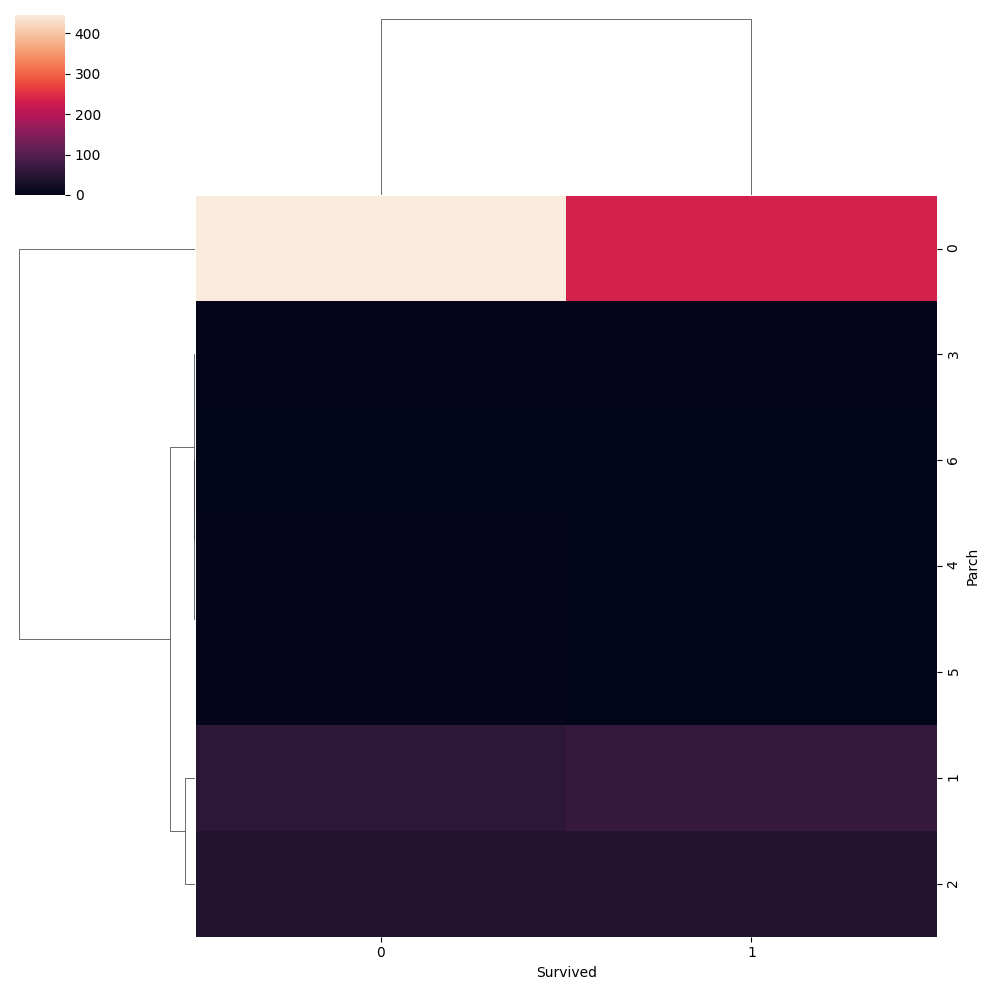

In [144]:
sns.clustermap(pd.crosstab(df["Parch"], df["Survived"]))

### **observations**
* The people who travelled with 1 or 2 parents or children had a similar survival rate, whileose 5, 4, and 6 were more similar to each other. 
* People who travelled alone had a extremely higher chance of surviving as opposed to those who did'nt.

### **Pairplot**

*plot scatter plots among many different numerical columns.*

In [147]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(<seaborn.axisgrid.PairGrid at 0x1d161b01340>,
 Text(0.5, 1.0, 'Pair plot Iris datset'))

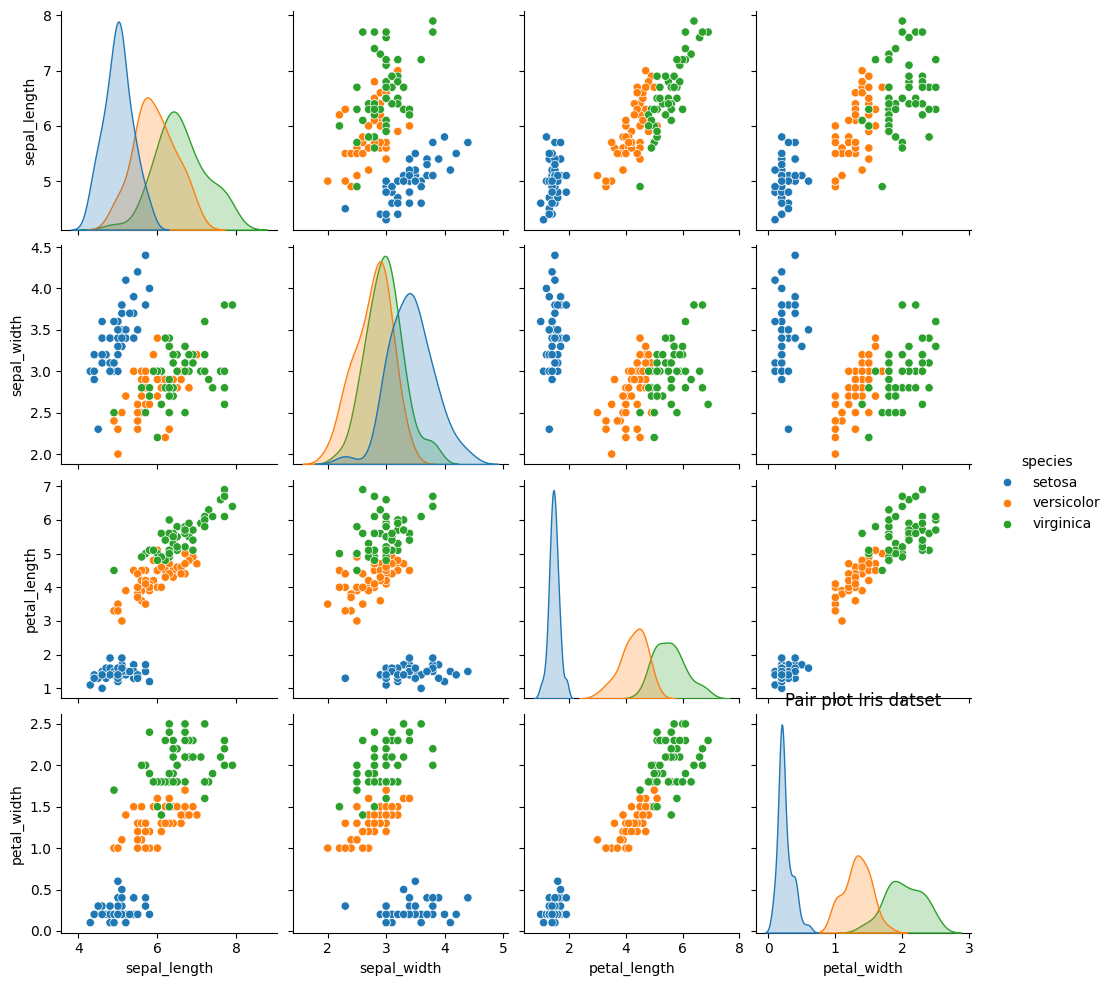

In [153]:
sns.pairplot(iris, hue = "species" ), plt.title("Pair plot Iris datset")